In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('C:\\Users\\Dell\\Desktop\\Python Notebooks\\AI 201\\HEART ATTACK\\heart_dataset.csv')

In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [4]:
# One Hot Encoding columns Sex, CP, FBS, RestECG, Exang, Slope, CA, and Thal
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2, 5, 6, 8, 10, 11, 12])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:, [0, 3, 4, 7, 9]] = sc.fit_transform(X[:, [0, 3, 4, 7, 9]])

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [7]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [8]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [9]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[134  36]
 [ 39 169]]
0.8015873015873016


In [10]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.7331436699857752


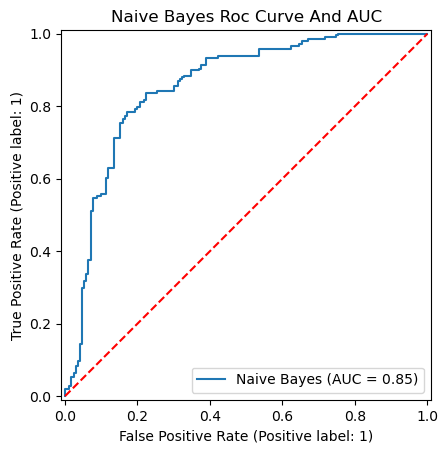

In [11]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(estimator=classifier, X=X_test, y=y_test, name = "Naive Bayes")
plt.title("Naive Bayes Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

In [12]:
# Hyperparameter optimization using GridSearchCV
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}
grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

Best parameters found:  {'var_smoothing': 3.511191734215127e-05}
Best cross-validation accuracy:  0.7867549668874172


In [13]:
# Evaluating the model with the best found parameters on the test set
best_classifier = grid_search.best_estimator_
y_pred_best = best_classifier.predict(X_test)

cm_best = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix with best parameters:\n", cm_best)
print("Accuracy Score with best parameters:", accuracy_score(y_test, y_pred_best))

accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best, average='weighted')
recall = recall_score(y_test, y_pred_best, average='weighted')
f1 = f1_score(y_test, y_pred_best, average='weighted')

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)

Confusion Matrix with best parameters:
 [[135  35]
 [ 44 164]]
Accuracy Score with best parameters: 0.791005291005291
Accuracy Score: 0.791005291005291
Precision Score: 0.7926703066929338
Recall Score: 0.791005291005291
F1 Score: 0.7913893128792842


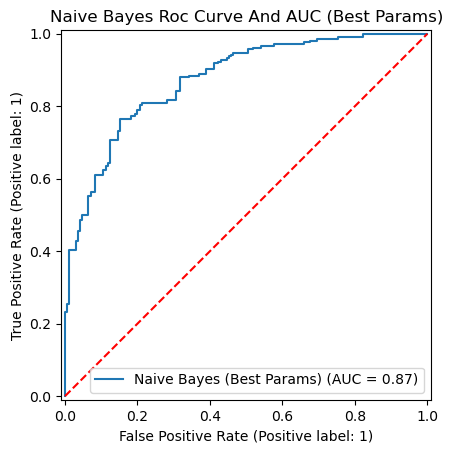

In [14]:
RocCurveDisplay.from_estimator(estimator=best_classifier, X=X_test, y=y_test, name="Naive Bayes (Best Params)")
plt.title("Naive Bayes Roc Curve And AUC (Best Params)")
plt.plot([0, 1], [0, 1], "r--")
plt.show()